# Post-secondary education analysis

Analysis goal: Examine post-secondary student data across the US for the year 2017.

This data contains the number of students enrolled in the fall, by race/ethnicity, gender, attendance (full- or part-time) status and level of student.  Institutions with traditional academic year calendar systems (semester, quarter, trimester or  4-1-4) report their enrollment as of October 15 or the official fall reporting date of the institution for 2017. Institutions with calendar systems that differ by program or allow continuous enrollment report students that are enrolled at any time between August 1 and October 31. This data has multiple records per institution.  Records are uniquely defined by the variables IPEDS ID (ID), and the attendance status and level of student (EFALEVEL). Each instance will contain the total enrollment, enrollment for men and women, and the total enrollment and enrollment for men and women for all nine race/ethnicity categories. 

Source: www.data.gov

Author: Carlos Caballero
Data Scientist

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# The code was removed by Watson Studio for sharing.

,UNITID,EFALEVEL,LINE,SECTION,LSTUDY,XEFTOTLT,EFTOTLT,XEFTOTLM,EFTOTLM,XEFTOTLW,...,XEFUNKNM,EFUNKNM,XEFUNKNW,EFUNKNW,XEFNRALT,EFNRALT,XEFNRALM,EFNRALM,XEFNRALW,EFNRALW
0,100654,1,29,3,4,R,6001,R,2429,R,...,R,65,R,124,R,72,R,38,R,34
1,100654,2,99,3,1,R,5038,R,2134,R,...,R,62,R,115,R,45,R,23,R,22
2,100654,3,99,3,1,R,4824,R,2038,R,...,R,54,R,106,R,43,R,22,R,21
3,100654,4,99,3,1,R,1294,R,518,R,...,R,22,R,46,R,9,R,3,R,6
4,100654,5,99,3,1,R,3530,R,1520,R,...,R,32,R,60,R,34,R,19,R,15


In [4]:
df.columns

Index(['UNITID', 'EFALEVEL', 'LINE', 'SECTION', 'LSTUDY', 'XEFTOTLT',
       'EFTOTLT', 'XEFTOTLM', 'EFTOTLM', 'XEFTOTLW', 'EFTOTLW', 'XEFAIANT',
       'EFAIANT', 'XEFAIANM', 'EFAIANM', 'XEFAIANW', 'EFAIANW', 'XEFASIAT',
       'EFASIAT', 'XEFASIAM', 'EFASIAM', 'XEFASIAW', 'EFASIAW', 'XEFBKAAT',
       'EFBKAAT', 'XEFBKAAM', 'EFBKAAM', 'XEFBKAAW', 'EFBKAAW', 'XEFHISPT',
       'EFHISPT', 'XEFHISPM', 'EFHISPM', 'XEFHISPW', 'EFHISPW', 'XEFNHPIT',
       'EFNHPIT', 'XEFNHPIM', 'EFNHPIM', 'XEFNHPIW', 'EFNHPIW', 'XEFWHITT',
       'EFWHITT', 'XEFWHITM', 'EFWHITM', 'XEFWHITW', 'EFWHITW', 'XEF2MORT',
       'EF2MORT', 'XEF2MORM', 'EF2MORM', 'XEF2MORW', 'EF2MORW', 'XEFUNKNT',
       'EFUNKNT', 'XEFUNKNM', 'EFUNKNM', 'XEFUNKNW', 'EFUNKNW', 'XEFNRALT',
       'EFNRALT', 'XEFNRALM', 'EFNRALM', 'XEFNRALW', 'EFNRALW '],
      dtype='object')

In [5]:
df.shape

(127757, 65)

In [6]:
df = df.drop(df.columns[[2,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63]], axis=1)
df.head()

,UNITID,EFALEVEL,SECTION,LSTUDY,EFTOTLT,EFTOTLM,EFTOTLW,EFAIANT,EFAIANM,EFAIANW,...,EFWHITW,EF2MORT,EF2MORM,EF2MORW,EFUNKNT,EFUNKNM,EFUNKNW,EFNRALT,EFNRALM,EFNRALW
0,100654,1,3,4,6001,2429,3572,12,2,10,...,128,57,19,38,189,65,124,72,38,34
1,100654,2,3,1,5038,2134,2904,10,1,9,...,47,54,19,35,177,62,115,45,23,22
2,100654,3,3,1,4824,2038,2786,10,1,9,...,43,50,18,32,160,54,106,43,22,21
3,100654,4,3,1,1294,518,776,2,0,2,...,6,14,4,10,68,22,46,9,3,6
4,100654,5,3,1,3530,1520,2010,8,1,7,...,37,36,14,22,92,32,60,34,19,15


In [7]:
df.shape

(127757, 34)

In [8]:
df.rename(columns={'UNITID': 'ID', "EFALEVEL":'STUDENT_LEVEL','SECTION':'ATTEND_STATUS','LSSTUDY':'STUDENT_LEVEL1','EFTOTLT':'GRAND_TOTAL',
                  'EFTOTLM':'GRAND_TOTAL_MEN','EFTOTLW':'GRAND_TOTAL_WOMEN','EFNRALT':'NONRESIDENT_ALIEN_TOTAL','EFNRALM':'NONRESIDENT_MEN',
                  'EFNRALM':'NONRESDIENT_MEN','EFNRALW':'NONRESIDENT_WOMEN'},inplace=True)

In [9]:
# Upload third dataset
body = client_e0b0de43d3ed41a0a4d24ada8415e71d.get_object(Bucket='education-donotdelete-pr-lmdk4yjz3pwv2v',Key='ef2017c.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df1 = pd.read_csv(body)
df1.head()


,UNITID,EFCSTATE,LINE,XEFRES01,EFRES01,XEFRES02,EFRES02
0,100654,1,1,R,667,R,524.0
1,100654,5,5,R,7,R,6.0
2,100654,6,6,R,22,R,16.0
3,100654,8,8,R,4,R,3.0
4,100654,10,10,R,1,R,0.0


In [10]:
df1.shape

(39500, 7)

In [11]:
df1 = df1.drop(['LINE', 'XEFRES01', 'XEFRES02'], axis=1)
df1.head()

,UNITID,EFCSTATE,EFRES01,EFRES02
0,100654,1,667,524.0
1,100654,5,7,6.0
2,100654,6,22,16.0
3,100654,8,4,3.0
4,100654,10,1,0.0


In [12]:
df1.rename(columns={'UNITID':'ID','EFRES01':'1ST_DEG_SEEK_UND','EFRES02':'1ST_DEG_SEEK_UND_HS_12MOS'},inplace=True)

In [13]:
body = client_e0b0de43d3ed41a0a4d24ada8415e71d.get_object(Bucket='education-donotdelete-pr-lmdk4yjz3pwv2v',Key='state_mapping.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

state_df = pd.read_csv(body)
state_df.rename(columns={'code':'STATE_CODE', 'value':'STATE'},inplace=True)
state_df.head()


,STATE_CODE,STATE
0,1,Alabama
1,2,Alaska
2,4,Arizona
3,5,Arkansas
4,6,California


In [14]:
# Merge df1 with state_df
new_df1 = df1.merge(state_df, left_on='EFCSTATE', right_on='STATE_CODE', how='left')
new_df1.head()

,ID,EFCSTATE,1ST_DEG_SEEK_UND,EFRES02,STATE_CODE,STATE
0,100654,1,667,524.0,1.0,Alabama
1,100654,5,7,6.0,5.0,Arkansas
2,100654,6,22,16.0,6.0,California
3,100654,8,4,3.0,8.0,Colorado
4,100654,10,1,0.0,10.0,Delaware


In [15]:
new_df1.rename(columns={'EFRES02':'1ST_DEG_SEEK_12MOS'},inplace=True)

In [16]:
new_df1.head()

,ID,EFCSTATE,1ST_DEG_SEEK_UND,EFRES02,STATE_CODE,STATE
0,100654,1,667,524.0,1.0,Alabama
1,100654,5,7,6.0,5.0,Arkansas
2,100654,6,22,16.0,6.0,California
3,100654,8,4,3.0,8.0,Colorado
4,100654,10,1,0.0,10.0,Delaware


In [17]:
new_df1.shape

(39500, 6)

In [18]:
# Merge df1 and df2
df_merge = df.merge(new_df1, on='ID')
df_merge.head()

,ID,STUDENT_LEVEL,ATTEND_STATUS,LSTUDY,GRAND_TOTAL,GRAND_TOTAL_MEN,GRAND_TOTAL_WOMEN,EFAIANT,EFAIANM,EFAIANW,...,EFUNKNM,EFUNKNW,NONRESIDENT_ALIEN_TOTAL,NONRESDIENT_MEN,EFNRALW,EFCSTATE,1ST_DEG_SEEK_UND,EFRES02,STATE_CODE,STATE
0,100654,1,3,4,6001,2429,3572,12,2,10,...,65,124,72,38,34,1,667,524.0,1.0,Alabama
1,100654,1,3,4,6001,2429,3572,12,2,10,...,65,124,72,38,34,5,7,6.0,5.0,Arkansas
2,100654,1,3,4,6001,2429,3572,12,2,10,...,65,124,72,38,34,6,22,16.0,6.0,California
3,100654,1,3,4,6001,2429,3572,12,2,10,...,65,124,72,38,34,8,4,3.0,8.0,Colorado
4,100654,1,3,4,6001,2429,3572,12,2,10,...,65,124,72,38,34,10,1,0.0,10.0,Delaware


In [19]:
df_merge.tail()

,ID,STUDENT_LEVEL,ATTEND_STATUS,LSTUDY,GRAND_TOTAL,GRAND_TOTAL_MEN,GRAND_TOTAL_WOMEN,EFAIANT,EFAIANM,EFAIANW,...,EFUNKNM,EFUNKNW,NONRESIDENT_ALIEN_TOTAL,NONRESDIENT_MEN,EFNRALW,EFCSTATE,1ST_DEG_SEEK_UND,EFRES02,STATE_CODE,STATE
976087,491181,59,2,1,33,6,27,0,0,0,...,0,1,0,0,0,99,2,0.0,NaN,NaN
976088,491181,60,2,1,8,2,6,0,0,0,...,0,0,0,0,0,21,1,0.0,21.0,Kentucky
976089,491181,60,2,1,8,2,6,0,0,0,...,0,0,0,0,0,54,1,0.0,54.0,West Virginia
976090,491181,60,2,1,8,2,6,0,0,0,...,0,0,0,0,0,58,2,0.0,NaN,NaN
976091,491181,60,2,1,8,2,6,0,0,0,...,0,0,0,0,0,99,2,0.0,NaN,NaN


In [20]:
# should have 39 features
df_merge.shape

(976092, 39)

In [21]:
#Check for missing values
df_merge.isnull().values.any()

True

In [22]:
# How many missing values
df_merge.isnull().sum().sum()

224956

In [23]:
# Separate NaN and examine
nan_rows = df_merge[df_merge.isnull().T.any().T]

In [24]:
nan_rows.shape

(116721, 39)

In [25]:
df_merge.columns

Index(['ID', 'STUDENT_LEVEL', 'ATTEND_STATUS', 'LSTUDY', 'GRAND_TOTAL',
       'GRAND_TOTAL_MEN', 'GRAND_TOTAL_WOMEN', 'EFAIANT', 'EFAIANM', 'EFAIANW',
       'EFASIAT', 'EFASIAM', 'EFASIAW', 'EFBKAAT', 'EFBKAAM', 'EFBKAAW',
       'EFHISPT', 'EFHISPM', 'EFHISPW', 'EFNHPIT', 'EFNHPIM', 'EFNHPIW',
       'EFWHITT', 'EFWHITM', 'EFWHITW', 'EF2MORT', 'EF2MORM', 'EF2MORW',
       'EFUNKNT', 'EFUNKNM', 'EFUNKNW', 'NONRESIDENT_ALIEN_TOTAL',
       'NONRESDIENT_MEN', 'EFNRALW ', 'EFCSTATE', '1ST_DEG_SEEK_UND',
       'EFRES02 ', 'STATE_CODE', 'STATE'],
      dtype='object')

## Data Exploration 

### I want to focus only on Hispanics, Asians, White, and African-American

In [26]:
df_merge.describe()

,ID,STUDENT_LEVEL,ATTEND_STATUS,LSTUDY,GRAND_TOTAL,GRAND_TOTAL_MEN,GRAND_TOTAL_WOMEN,EFAIANT,EFAIANM,EFAIANW,...,EFUNKNT,EFUNKNM,EFUNKNW,NONRESIDENT_ALIEN_TOTAL,NONRESDIENT_MEN,EFNRALW,EFCSTATE,1ST_DEG_SEEK_UND,EFRES02,STATE_CODE
count,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,...,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,976092.000000,967512.000000,867904.000000
mean,196175.801385,27.793825,2.005138,1.511798,3472.771241,1571.010319,1901.760922,19.317173,7.836987,11.480186,...,133.492107,60.011161,73.480946,197.232322,109.706431,87.525891,37.929695,171.316630,141.309005,32.855188
std,77209.117740,17.691461,0.825985,1.058778,6622.527380,3082.292465,3630.433518,71.655063,28.010544,44.397054,...,777.029660,305.447651,477.179506,602.192803,350.126138,262.422251,25.951119,634.662649,553.669245,21.741657
min,100654.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,147679.000000,12.000000,1.000000,1.000000,196.000000,72.000000,106.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.000000,1.000000,1.000000,17.000000
50%,188030.000000,24.000000,2.000000,1.000000,1035.000000,436.000000,577.000000,3.000000,1.000000,2.000000,...,22.000000,9.000000,11.000000,17.000000,8.000000,8.000000,34.000000,4.000000,3.000000,31.000000
75%,218724.000000,42.000000,3.000000,1.000000,3442.000000,1509.000000,1936.000000,13.000000,6.000000,8.000000,...,93.000000,42.000000,50.000000,111.000000,58.000000,51.000000,51.000000,21.000000,16.000000,46.000000
max,491181.000000,60.000000,3.000000,4.000000,103975.000000,35846.000000,71375.000000,2251.000000,843.000000,1408.000000,...,34865.000000,12570.000000,22295.000000,11198.000000,6723.000000,4475.000000,99.000000,12173.000000,11542.000000,98.000000


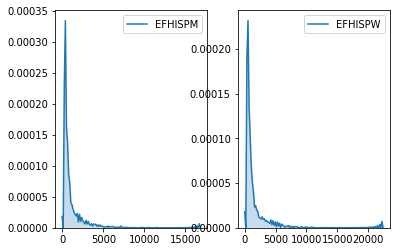

In [28]:
# Distribution of hispanic male and female students
fig, ax =plt.subplots(1,2)
sns.kdeplot(df_merge['EFHISPM'], shade=True,ax=ax[0])
sns.kdeplot(df_merge['EFHISPW'], shade=True,ax=ax[1])
fig.show()

In [61]:
df_merge[['EFHISPM', 'EFHISPW']].describe()

,EFHISPM,EFHISPW
count,976092.000000,976092.000000
mean,229.583547,308.243276
std,673.771781,899.960860
min,0.000000,0.000000
25%,4.000000,6.000000
50%,31.000000,43.000000
75%,150.000000,206.000000
max,16830.000000,22432.000000


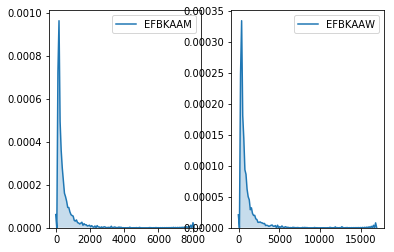

In [29]:
# Distribution of african-american male and female students
fig, ax =plt.subplots(1,2)
sns.kdeplot(df_merge['EFBKAAM'], shade=True,ax=ax[0])
sns.kdeplot(df_merge['EFBKAAW'], shade=True,ax=ax[1])
fig.show()

In [62]:
df_merge[['EFBKAAM', 'EFBKAAW']].describe()

,EFBKAAM,EFBKAAW
count,976092.000000,976092.000000
mean,144.404245,229.000736
std,344.818204,650.902258
min,0.000000,0.000000
25%,4.000000,5.000000
50%,31.000000,37.000000
75%,123.000000,169.000000
max,8067.000000,16946.000000


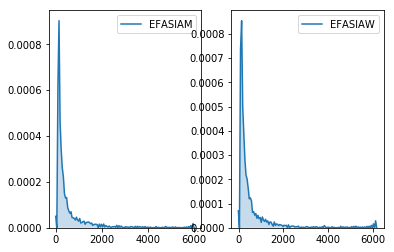

In [30]:
# Distribution of asian male and female students
fig, ax =plt.subplots(1,2)
sns.kdeplot(df_merge['EFASIAM'], shade=True,ax=ax[0])
sns.kdeplot(df_merge['EFASIAW'], shade=True,ax=ax[1])
fig.show()

In [65]:
df_merge[['EFASIAM', 'EFASIAW']].describe()

,EFASIAM,EFASIAW
count,976092.000000,976092.000000
mean,119.202204,129.180780
std,402.133361,414.289716
min,0.000000,0.000000
25%,1.000000,2.000000
50%,9.000000,13.000000
75%,58.000000,72.000000
max,5991.000000,6167.000000


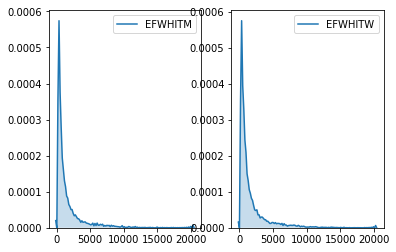

In [31]:
# Distribution of white male and female students
fig, ax =plt.subplots(1,2)
sns.kdeplot(df_merge['EFWHITM'], shade=True,ax=ax[0])
sns.kdeplot(df_merge['EFWHITW'], shade=True,ax=ax[1])
fig.show()

In [79]:
df_merge[['EFWHITM', 'EFWHITW']].describe()

,EFWHITM,EFWHITW
count,976092.000000,976092.000000
mean,839.801314,984.660688
std,1700.748958,1864.500773
min,0.000000,0.000000
25%,30.000000,43.000000
50%,216.000000,288.000000
75%,796.000000,1003.000000
max,20328.000000,20280.000000


In [76]:
# Percentage of students by State and Level of Study (1=freshmen, 2=sophmore, 3=junior, 4=senior)
df_merge.groupby(['STATE'])['LSTUDY'].value_counts(normalize=True)

STATE                 LSTUDY
Alabama               1         0.804857
                      4         0.119317
                      3         0.075826
Alaska                1         0.802164
                      4         0.118944
                      3         0.078891
American Samoa        1         0.797853
                      4         0.116279
                      3         0.085868
Arizona               1         0.801131
                      4         0.119332
                      3         0.079537
Arkansas              1         0.803822
                      4         0.118901
                      3         0.077276
California            1         0.808635
                      4         0.120360
                      3         0.071006
Colorado              1         0.799724
                      4         0.118478
                      3         0.081799
Connecticut           1         0.798493
                      4         0.118947
                      3     